In [1]:
#importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from array import *

In [2]:
# reading and shuffling the data

df = pd.read_csv("FoDS-A1.csv")
df = df.sample(frac = 1)

In [3]:
# normalising the data values

myData = (df - df.min()) / (df.max() - df.min())
X = myData.iloc[:, :-1]
y = myData.iloc[:, -1:]

In [4]:
# splitting the dataset into training data and testing data

splitData = int(0.7 * len(myData))
train_X, test_X, train_y, test_y = X[:splitData], X[splitData:], y[:splitData], y[splitData:]
iter_value=201
skip_num=5
iter_scaled= int(((iter_value-1)/skip_num)+1)
coeff_list = np.zeros((10, 11, 11))
error_array = np.zeros((10,iter_scaled))

In [5]:
def stocasticGD(deg, X, y, learning_rate, iterations):
    
    # assigning random values for weights
    
    A = np.zeros((deg+1, deg+1))
    for m in range(deg+1):
            for n in range(deg+1-m):
                A[m][n] = np.random.randn()
                
    for itr in range(iterations):
        sumItrError = 0
        
        for z in range(len(X)):    # for each row in input data
            row = X.iloc[z]              # contains strength, temperature
            column = y.iloc[z]       # contains pressure
            
            dotP_wx = 0                # variable for calculating error in each iteration
            
            for m in range(deg+1):                    # power of x1
                for n in range(deg+1-m):            # power of x2
                    dotP_wx += A[m][n] * (row[0]**m) * (row[1]**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
            dotP_wx -= column[0]                    # yn - (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...) 
                
             # for each parameter(w0,w1,w2,...)    
            for m in range(deg+1):                   # power of x1
                for n in range(deg+1-m):           # power of x2
                    A[m][n] -= (learning_rate/len(X)) * dotP_wx * (row[0]**m) * (row[1]**n) # calculating w0,w1,w2,... for each iteration
                    
            sumItrError +=  (dotP_wx**2)*0.5  
        
        if(itr%skip_num == 0):
            index = int(itr/skip_num)
            error_array[deg][index] = sumItrError
        
        if(itr == iterations - 1):
            print("Error of last iteration of degree ", deg, " :  " ,sumItrError)
            for m in range(deg+1):                   # power of x1
                for n in range(deg+1-m):
                    coeff_list[deg][m][n] = A[m][n]
    return sumItrError

#     cost_history = np.zeros(iterations)

In [6]:
def testing_SGD(deg, X, y, learning_rate, iterations):
                
    for itr in range(iterations):
        sumItrError = 0
        
        for z in range(len(X)):    # for each row in input data
            row = X.iloc[z]              # contains strength, temperature
            column = y.iloc[z]       # contains pressure
            
            dotP_wx = 0                # variable for calculating error in each iteration
            
            for m in range(deg+1):                    # power of x1
                for n in range(deg+1-m):            # power of x2
                    dotP_wx += coeff_list[deg][m][n] * (row[0]**m) * (row[1]**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
            dotP_wx -= column[0]                    # yn - (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
            sumItrError +=  (dotP_wx**2)*0.5  
            
        if(itr == iterations - 1):
            print("Error of last iteration of degree ", deg, " :  " ,sumItrError)
            
    return sumItrError

Error of last iteration of degree  0  :   68.96343274967978
[68.96343274976553, 68.96343274967978, 68.96343274967978, 68.96343274967978, 68.96343274967978, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200]


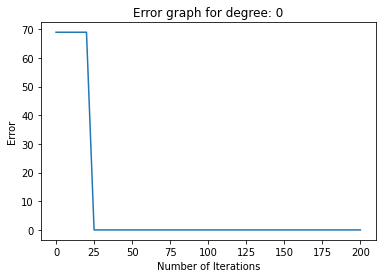

Error of last iteration of degree  1  :   37.59025308096698
[99.98714991253604, 70.72969437821267, 51.4192168735871, 38.605823538250256, 37.59025308096698, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200]


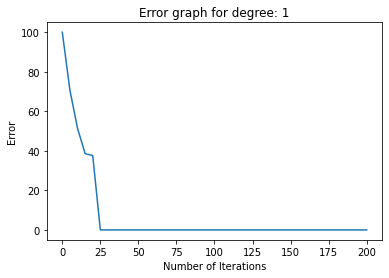

In [ ]:
#For training data
minError = 100000
minErrorDeg = -1
x_axis=[]
for i in range(iter_scaled):
    x_axis.append(i*skip_num)
    
for i in range(10):
    SGD_Error = stocasticGD(i, train_X, train_y, 0.5, iter_value)
    
    error_list = error_array[i].tolist()  
    print(error_list)
    print(x_axis)
    plt.plot(x_axis, error_list)
    plt.xlabel('Number of Iterations')
    plt.ylabel('Error')
    title = "Error graph for degree: " + str(i)
    plt.title(title)
    plt.show()
    error_list=error_array[i].tolist()
    
    if(SGD_Error <= minError):
        minError = SGD_Error
        minErrorDeg = i
print("Degree ", minErrorDeg, " gives minimum error.")      


In [ ]:
# for testing data
minError = 100000
minErrorDeg = -1
for i in range(3):
    SGD_Error = testing_SGD(i, test_X, test_y, 0.5, iter_value)    
    if(SGD_Error <= minError):
        minError = SGD_Error
        minErrorDeg = i
print("Degree ", minErrorDeg, " gives minimum error.") 

In [ ]:
list1=coeff_list[9].tolist()
print(list1)

In [ ]:
for i in range(10):
    print(i)